In [41]:
import numpy as np
import cmath
from mpmath import nsum, exp, inf
import math 
from scipy.integrate import quad
import sympy as sym


K = 5
myu = 1.25
ro = 1
RO = 4

In [2]:
def eq_R(p):    # Функция для нахождения корней комплексного уравнения
    x = sym.Symbol('x', real = True)
    sol = sym.solve(x**(K+1) - (p+1) * x + p, x)
    return sol

In [42]:
# Для RO = 1

sol1 = []
R1 = []

# Берем только те корни, которые по модулю меньше 1
sol1 = eq_R(ro)
for k in range(len(sol1)):
    if abs(sol1[k]) < 1:
        R1.append(sol1[k])
R1 = [sym.N(solution) for solution in R1]


In [43]:
R1

[0.508660391642004]

In [55]:
q = []
q_K1 = ((ro/(1-R1[0]) + nsum(lambda i: nsum(lambda k: R1[0]**k, [0,i]), [0,K-2]))/(ro + 1 - R1[0]**K) + 1)**(-1)
q_K = q_K1 / (ro + 1 - R1[0]**K)
Q_sum = 0
j = 0
while Q_sum < 1:
    if 0 <= j <= K-2:
        q_j = q_K1 * nsum(lambda i: R1[0]**i, [0,j]) / (ro + 1 - R1[0]**K)
        q.insert(j, q_j)
    elif j == K-1:
        q_j = q_K1
        q.insert(j, q_j)
    elif j == K:
        q_j = q_K
        q.insert(j, q_j)
    elif j > K:
        q_j = q[K] * R1[0]**(j - K)
        q.insert(j, q_j)
    if q_j < 0.00000000000000001:
        break
    Q_sum += q_j
    j += 1
print(Q_sum, '    ', j)

1.00000000000000      56


In [56]:
q

[0.0982679216715992,
 0.148252921194921,
 0.173678310628679,
 0.186611199175705,
 0.193189647329097,
 0.0982679216715992,
 0.0499849995233214,
 0.0254253894337581,
 0.0129328885470259,
 0.00657844815339256,
 0.00334619601410128,
 0.00170207737504367,
 0.000865779344194708,
 0.000440387660293637,
 0.000224007759759268,
 0.000113943874809997,
 5.79587359860606e-5,
 2.94813133457451e-5,
 1.49959763925673e-5,
 7.62785922489755e-6,
 3.87998986072646e-6,
 1.97359716212413e-6,
 1.00389070542961e-6,
 5.10639439389592e-7,
 2.59742057227763e-7,
 1.32120496555374e-7,
 6.72044635217925e-8,
 3.41842487350858e-8,
 1.73881733495764e-8,
 8.84467506593460e-9,
 4.49893588298456e-9,
 2.28843048821119e-9,
 1.16403394837901e-9,
 5.92097964067055e-10,
 3.01176782292781e-10,
 1.53196700034525e-10,
 7.79250934378240e-11,
 3.96374085468233e-11,
 2.01619797551013e-11,
 1.02556005185080e-11,
 5.21661777626821e-12,
 2.65348684112323e-12,
 1.34972365582265e-12,
 6.86550963379224e-13,
 3.49221281914672e-13,
 1.7763

In [58]:
import matplotlib.pyplot as plt

In [62]:
x = np.arange(0,len(q),1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55])

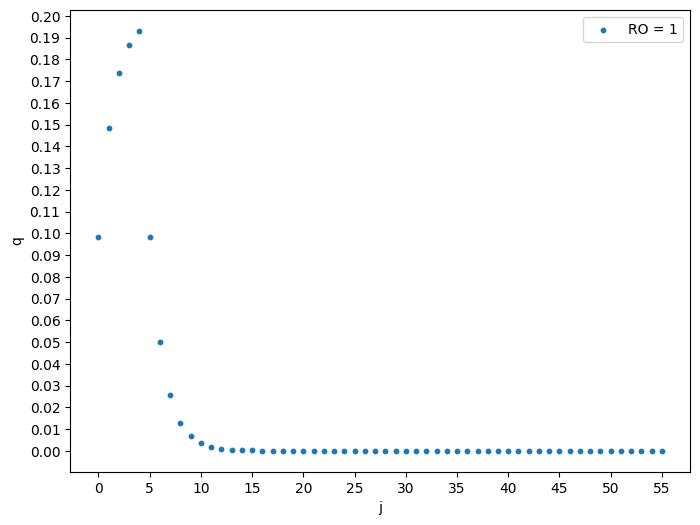

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x, q, s=10, label='RO = 1')
plt.locator_params(axis='x', nbins=20)
plt.locator_params(axis='y', nbins=40 )
plt.xlabel('j')
plt.ylabel('q')
plt.legend()
plt.show()

In [46]:
# Для RO = 4

sol2 = []
R2 = []

# Берем только те корни, которые по модулю меньше 1
sol2 = eq_R(RO)
for k in range(len(sol2)):
    if abs(sol2[k]) < 1:
        R2.append(sol2[k])
R2 = [sym.N(solution) for solution in R2]


In [47]:
sol2

[1, CRootOf(x**5 + x**4 + x**3 + x**2 + x - 4, 0)]

In [48]:
R2

[0.926519360580774]

In [ ]:
q = []
q_K1 = ((RO/(1-R2[0]) + nsum(lambda i: nsum(lambda k: R2[0]**k, [0,i]), [0,K-2]))/(RO + 1 - R2[0]**K) + 1)**(-1)
Q_sum = 0
j = 0
while True:
    if Q_sum >= 0.999:
        break
    if 0 <= j <= K-2:
        q_j = q_K1 * nsum(lambda i: R2[0]**i, [0,j]) / (RO + 1 - R2[0]**K)
        q.insert(j, q_j)
    elif j == K-1:
        q_j = q_K1
        q.insert(j, q_j)
    elif j == K:
        q_j = q_K1 / (RO + 1 - R2[0]**K)
        q.insert(j, q_j)
    elif j > K:
        q_j = q[K] * R2[0]**(j - K)
        q.insert(j, q_j)
    Q_sum += q_j
    j += 1
print(Q_sum)
q